# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [16]:
"""
According to the paper, the data represenets 79354 contacts from 17 marketing campaigns
"""

'\nAccording to the paper, the data represenets 79354 contacts from 17 marketing campaigns\n'

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [20]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df.dropna(inplace=True)
print(df.shape)
df = df.loc[df["job"] != "unknown"]
df = df.loc[df["marital"] != "unknown"]
df = df.loc[df["default"] != "unknown"]
df = df.loc[df["housing"] != "unknown"]

print(df.shape)
for column in df.columns:
    print(column)
    print(df[column].unique())


(41188, 21)
(31590, 21)
age
[56 37 40 59 24 25 29 57 35 50 30 55 41 46 49 54 34 52 32 38 45 39 60 53
 51 48 44 33 31 42 36 43 28 58 27 47 26 22 23 20 21 18 70 61 66 76 67 73
 88 95 19 77 68 75 63 62 65 72 82 64 71 69 78 85 80 79 83 81 74 17 87 91
 94 86 84 92 89]
job
['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
marital
['married' 'single' 'divorced']
education
['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'unknown' 'illiterate']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration
[ 261  226  151 ... 1246 1556 1868]
campaign
[ 1  2  3  4  5  6  7  8  9 10 12 11 18 23 14 22 25 17 15 20 19 39 13 42
 16 28 26 32 21 24 29 31 30 35 41 37 27 40 43 34 33]
pdays
[999   6   4   5   1   0   3  10   7 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [21]:
"""
The goal is to create a model that predicts the likelihood of marketing success, so that the bank can increase the efficiency of future marketing campaigns.
"""


'\nThe goal is to create a model that predicts the likelihood of marketing success, so that the bank can increase the efficiency of future marketing campaigns.\n'

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.dummy import DummyClassifier

df.drop(columns=["pdays"], inplace=True) # removed to simplify model

marketing_info = df.drop('y', axis=1)
marketing_result = df["y"]

categorical_columns = marketing_info.select_dtypes(include=['object']).columns.tolist()
numerical_columns = marketing_info.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(marketing_info, marketing_result, test_size=0.25, random_state=42, stratify=marketing_result)
#Added stratify to ensure there are equal ratios of the result classes in the data


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

c:\Users\dhous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


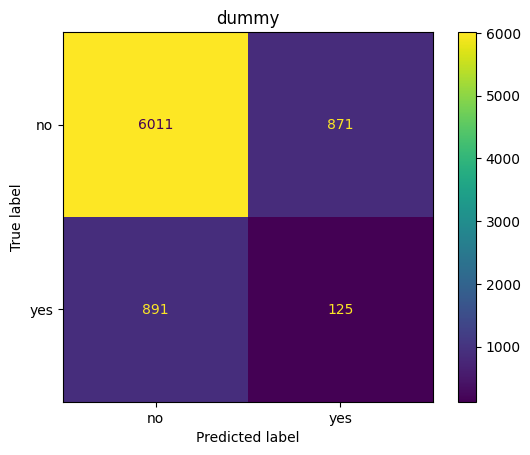

0.7727925037987506
0.7769055457077741


In [24]:

baseline = DummyClassifier()
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('dummy', baseline)
])
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid={"dummy__strategy":['stratified'], "dummy__random_state":[42]}, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_predict = best_model.predict(X_test)

y_confusion = confusion_matrix(y_test, y_predict, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(y_confusion, display_labels=best_model.classes_)

disp.plot()
plt.title("dummy")
plt.show()

# Evaluate on training and test sets
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

c:\Users\dhous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


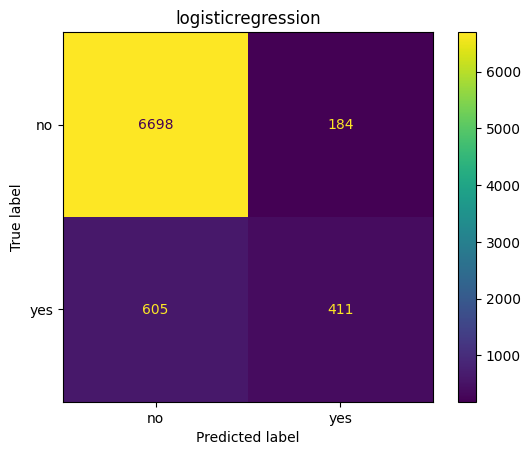

0.8981934830322472
0.900101291466194


In [25]:
baseline = LogisticRegression(max_iter=1000)
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('logisticregression', baseline)
])
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]}, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_predict = best_model.predict(X_test)

y_confusion = confusion_matrix(y_test, y_predict, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(y_confusion, display_labels=best_model.classes_)

disp.plot()
plt.title("logisticregression")
plt.show()

# Evaluate on training and test sets
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

### Problem 9: Score the Model

What is the accuracy of your model?

In [26]:
print(accuracy_score(y_test, y_predict))

0.900101291466194


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [27]:
def run_models(models):
    results = []
    for name, (model, params) in models.items():
        # Create a pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            (name, model)
        ])
        # Perform grid search
        grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
        
        # Fit the model and time it
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
        
        # Get the best estimator
        best_model = grid_search.best_estimator_

        y_predict = best_model.predict(X_test)

        y_confusion = confusion_matrix(y_test, y_predict, labels=best_model.classes_)
        disp = ConfusionMatrixDisplay(y_confusion, display_labels=best_model.classes_)

        disp.plot()
        plt.title(name)
        plt.show()
        
        # Evaluate on training and test sets
        train_score = best_model.score(X_train, y_train)
        test_score = best_model.score(X_test, y_test)
        
        # Append the results
        results.append([name, fit_time, train_score, test_score])

    # Create the results DataFrame
    results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
    results_df.set_index('Model', inplace=True)
    return results_df

c:\Users\dhous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


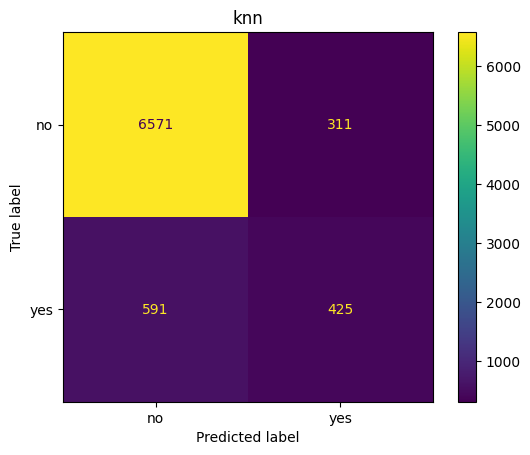

c:\Users\dhous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


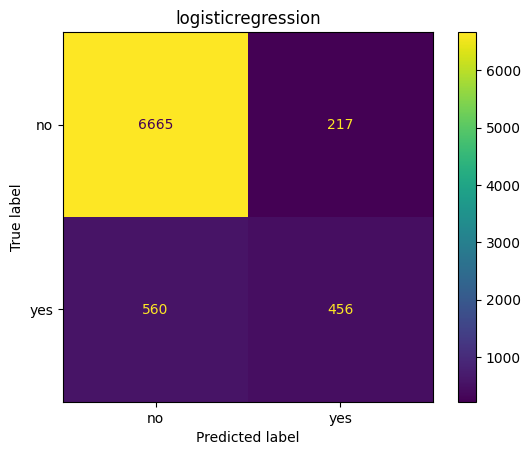

c:\Users\dhous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


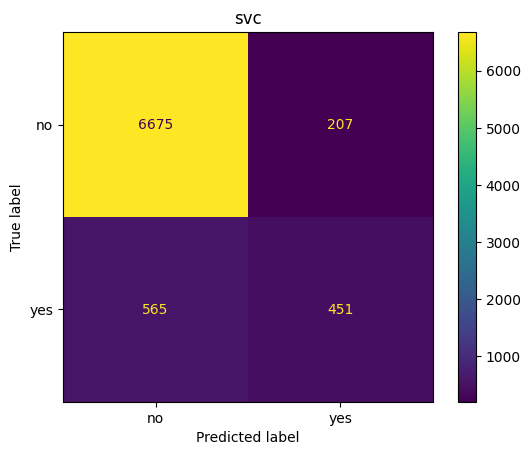

c:\Users\dhous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


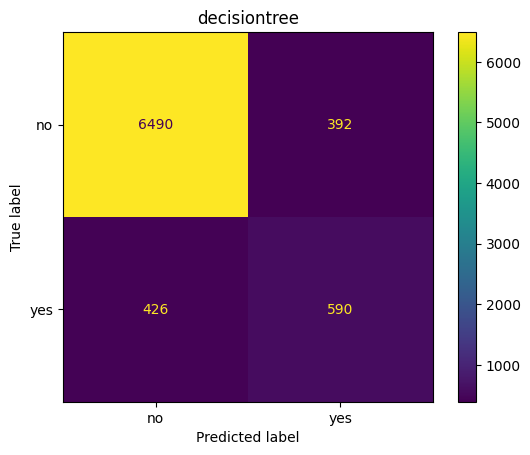

                    Train Time  Train Accuracy  Test Accuracy
Model                                                        
knn                   2.367895        0.919129       0.885794
logisticregression    1.425562        0.899333       0.901621
svc                  45.475614        0.914570       0.902254
decisiontree          0.946293        0.897476       0.896429


In [28]:
models = {
    'knn': (KNeighborsClassifier(), {}),
    'logisticregression': (LogisticRegression(max_iter=1000), {}),
    'svc': (SVC(), {}),
    'decisiontree': (DecisionTreeClassifier(max_depth=3), {}),
}

results_df = run_models(models)
print(results_df)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [29]:
# The dataset does not contain gender, however, the article shows it makes no difference in the marketing results

c:\Users\dhous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


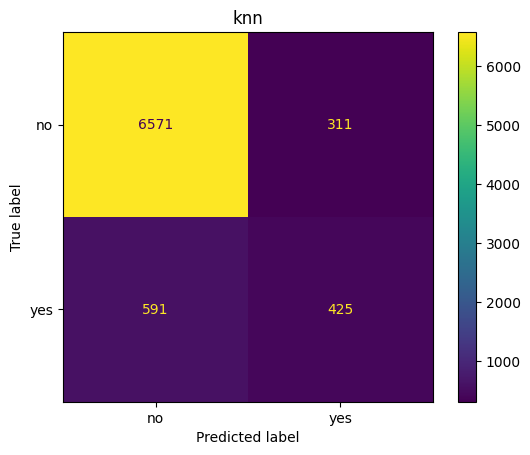

c:\Users\dhous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


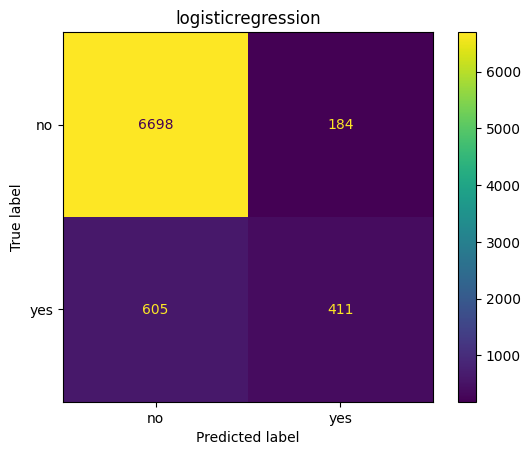

c:\Users\dhous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


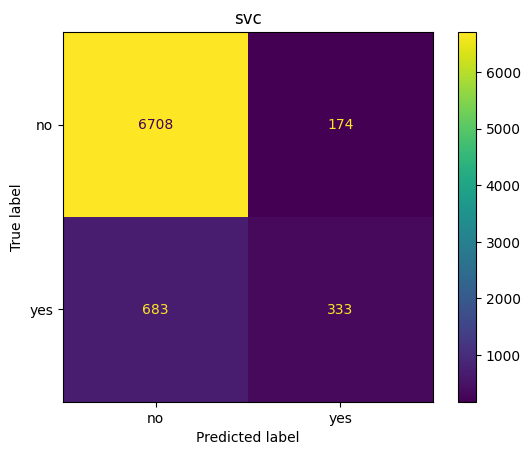

c:\Users\dhous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


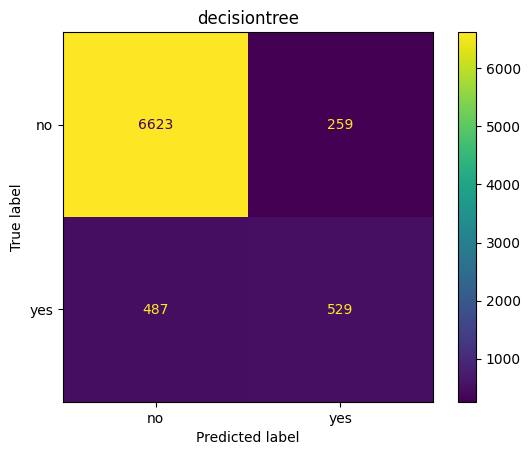

                    Train Time  Train Accuracy  Test Accuracy
Model                                                        
knn                   1.457201        0.919129       0.885794
logisticregression    0.740433        0.898193       0.900101
svc                  30.434138        0.891482       0.891492
decisiontree          0.758323        0.905622       0.905546


In [30]:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [5, 50, 50], 'knn__weights': ["uniform", "distance"]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', "poly", 'rbf']}),
    'decisiontree': (DecisionTreeClassifier(), {'decisiontree__max_depth': [5, 15, 45]}),
}

results_df = run_models(models)

print(results_df)

In [31]:
# Running through additional hyperparameters yields better results
# Exploring nonlinearity in the data may help improve performance

##### Questions